In [1]:
import os
print(os.getcwd())


C:\Users\91986


In [2]:
import pandas as pd
import sqlite3

# Load the correct sheet
df = pd.read_excel('healthcare_cleaned.xlsx', sheet_name='hospital data analysis')

# Connect to SQLite
conn = sqlite3.connect('healthcare.db')

# Store data into SQL table
df.to_sql('patients', conn, if_exists='replace', index=False)

print("✅ Data imported into SQLite successfully!")

✅ Data imported into SQLite successfully!


In [3]:
#Total number of patients
query = "SELECT COUNT(*) AS total_patients FROM patients;"
pd.read_sql_query(query, conn)

,total_patients
0,984


In [4]:
#Average Length of Stay per Condition
query = """
SELECT Condition, ROUND(AVG(Cost),2) AS avg_cost
FROM patients
GROUP BY Condition
ORDER BY avg_cost DESC;
"""
pd.read_sql_query(query, conn)

,Condition,avg_cost
0,Cancer,25000.0
1,Prostate Cancer,20000.0
2,Heart Attack,18000.0
3,Heart Disease,15000.0
4,Childbirth,12000.0
5,Stroke,10000.0
6,Appendicitis,8000.0
7,Kidney Stones,6000.0
8,Osteoarthritis,4000.0
9,Fractured Leg,3000.0


In [5]:
#Gender Distribution
query = """
SELECT Gender, COUNT(*) AS patient_count
FROM patients
GROUP BY Gender;
"""
pd.read_sql_query(query, conn)



,Gender,patient_count
0,Female,524
1,Male,460


In [6]:
#Readmission Count by Outcome
query = """
SELECT Outcome, COUNT(*) AS count
FROM patients
GROUP BY Outcome;
"""
pd.read_sql_query(query, conn)


,Outcome,count
0,Recovered,591
1,Stable,393


In [7]:
#Data Analysis & Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [8]:
#Basic Overview of Data
print(df.shape)
print(df.describe())
print(df['Condition'].value_counts())


(984, 10)
        Patient_ID         Age          Cost  Length_of_Stay  Satisfaction
count   984.000000  984.000000    984.000000      984.000000    984.000000
mean    500.329268   53.754065   8367.479675       37.663618      3.598577
std     288.979531   14.941135   7761.990976       19.595805      0.883002
min       1.000000   25.000000    100.000000        1.000000      2.000000
25%     250.750000   45.000000   1000.000000       21.000000      3.000000
50%     500.500000   55.000000   6000.000000       38.000000      4.000000
75%     750.250000   65.000000  15000.000000       54.250000      4.000000
max    1000.000000   78.000000  25000.000000       76.000000      5.000000
Condition
Fractured Leg            67
Heart Attack             67
Fractured Arm            66
Hypertension             66
Appendicitis             66
Cancer                   66
Stroke                   66
Allergic Reaction        66
Diabetes                 65
Heart Disease            65
Respiratory Infection    

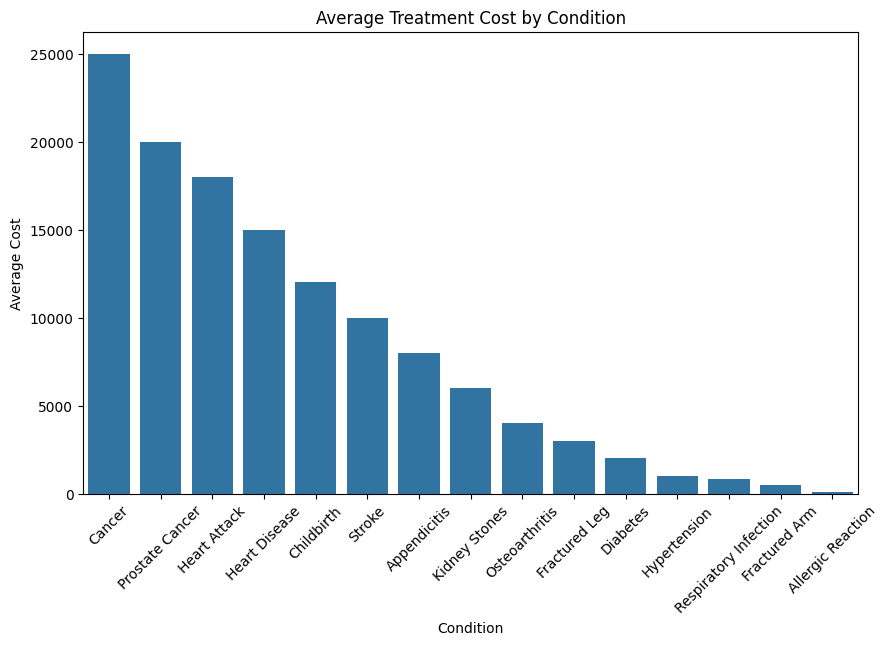

In [9]:
#Average Cost by Condition
avg_cost = df.groupby('Condition')['Cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost.index, y=avg_cost.values)
plt.title('Average Treatment Cost by Condition')
plt.xticks(rotation=45)
plt.ylabel('Average Cost')
plt.xlabel('Condition')
plt.show()


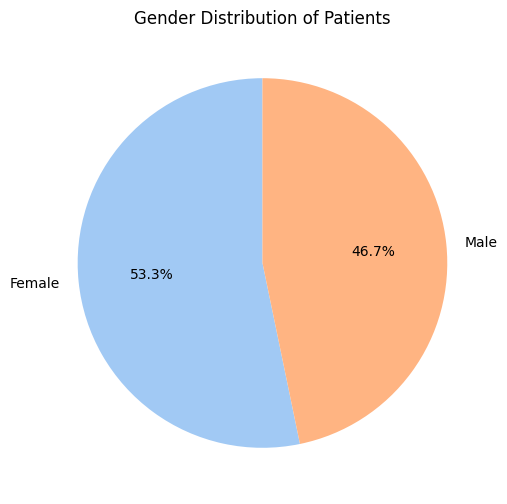

In [10]:
#Gender Distribution
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution of Patients')
plt.ylabel('')
plt.show()


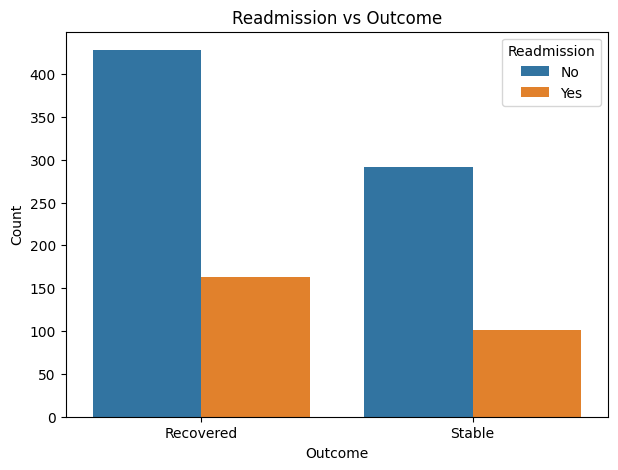

In [11]:
#Readmission by Outcome
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Outcome', hue='Readmission')
plt.title('Readmission vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


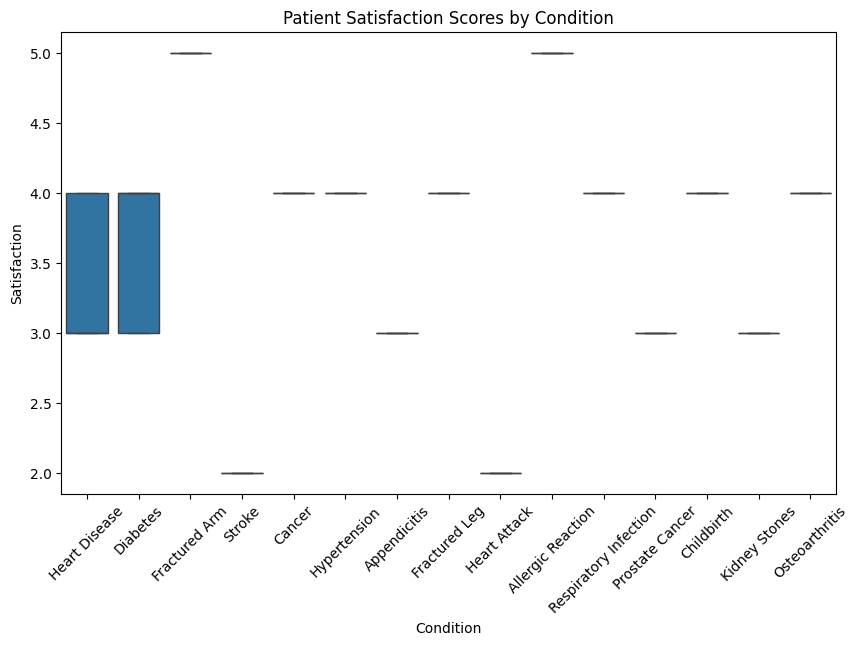

In [12]:
#Satisfaction by Condition
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Condition', y='Satisfaction')
plt.title('Patient Satisfaction Scores by Condition')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Correlation between numerical features
df.corr(numeric_only=True)


,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
Patient_ID,1.000000,-0.002935,-0.004168,0.989917,0.005263
Age,-0.002935,1.000000,0.303816,0.075080,-0.750429
Cost,-0.004168,0.303816,1.000000,0.114206,-0.469658
Length_of_Stay,0.989917,0.075080,0.114206,1.000000,-0.080891
Satisfaction,0.005263,-0.750429,-0.469658,-0.080891,1.000000


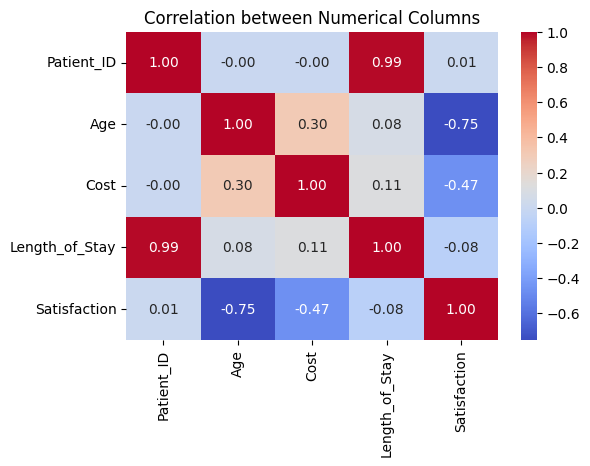

In [14]:
# Visualize correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numerical Columns")
plt.show()


In [15]:
# Average cost, stay, and satisfaction per condition
avg_summary = df.groupby('Condition')[['Cost', 'Length_of_Stay', 'Satisfaction']].mean().round(2)
avg_summary.sort_values(by='Cost', ascending=False)


,Cost,Length_of_Stay,Satisfaction
Condition,,,
Cancer,25000.0,42.65,4.00
Prostate Cancer,20000.0,41.58,3.00
Heart Attack,18000.0,41.00,2.00
Heart Disease,15000.0,38.22,3.49
Childbirth,12000.0,35.52,4.00
Stroke,10000.0,40.33,2.00
Appendicitis,8000.0,37.44,3.00
Kidney Stones,6000.0,36.46,3.00
Osteoarthritis,4000.0,37.86,4.00


In [16]:
readmission_rate = df.groupby('Condition')['Readmission'].value_counts(normalize=True).unstack().fillna(0) * 100
readmission_rate


Readmission,No,Yes
Condition,,
Allergic Reaction,100.000000,0.000000
Appendicitis,50.000000,50.000000
Cancer,50.000000,50.000000
Childbirth,100.000000,0.000000
Diabetes,98.461538,1.538462
Fractured Arm,50.000000,50.000000
Fractured Leg,100.000000,0.000000
Heart Attack,0.000000,100.000000
Heart Disease,1.538462,98.461538


In [17]:
# Print summary
print("Average patient satisfaction score:", df['Satisfaction'].mean().round(2))
print("Average hospital stay duration:", df['Length_of_Stay'].mean().round(2))
print("Average treatment cost:", df['Cost'].mean().round(2))


Average patient satisfaction score: 3.6
Average hospital stay duration: 37.66
Average treatment cost: 8367.48


In [18]:
df.to_csv("healthcare_final.csv", index=False)
print("✅ Final dataset saved as 'healthcare_final.csv'")


✅ Final dataset saved as 'healthcare_final.csv'
